In [1]:
import os
os.path.expanduser('~/.keras/models')
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
model = ResNet152(weights='imagenet')

In [3]:
model.summary()

Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 60,419,944 (230.48 MB)

 Trainable params: 60,268,520 (229.91 MB)

 Non-trainable params: 151,424 (591.50 KB)

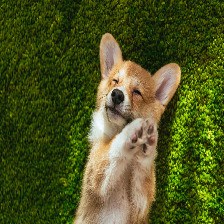

In [4]:
img = image.load_img('image.jpeg', target_size=(224, 224))
img

In [5]:
X = image.img_to_array(img)
X

array([[[32., 44.,  4.],
        [22., 39.,  5.],
        [55., 87.,  4.],
        ...,
        [16., 28.,  6.],
        [13., 24.,  8.],
        [27., 50.,  8.]],

       [[37., 48., 16.],
        [38., 58.,  9.],
        [73., 90., 10.],
        ...,
        [14., 32.,  8.],
        [28., 49.,  8.],
        [16., 41.,  1.]],

       [[35., 47.,  7.],
        [29., 47.,  7.],
        [27., 43.,  6.],
        ...,
        [18., 43.,  3.],
        [43., 74.,  0.],
        [53., 84.,  8.]],

       ...,

       [[27., 38.,  6.],
        [45., 67.,  5.],
        [51., 76.,  0.],
        ...,
        [40., 48.,  1.],
        [27., 41.,  8.],
        [23., 36., 10.]],

       [[37., 51.,  0.],
        [38., 60.,  0.],
        [46., 68.,  4.],
        ...,
        [62., 67.,  3.],
        [57., 68.,  8.],
        [24., 39.,  0.]],

       [[47., 63.,  1.],
        [38., 58.,  9.],
        [19., 36.,  0.],
        ...,
        [31., 45.,  0.],
        [35., 61.,  0.],
        [39., 58.,  0.]]

In [6]:
X = np.expand_dims(X, axis=0)
X

array([[[[32., 44.,  4.],
         [22., 39.,  5.],
         [55., 87.,  4.],
         ...,
         [16., 28.,  6.],
         [13., 24.,  8.],
         [27., 50.,  8.]],

        [[37., 48., 16.],
         [38., 58.,  9.],
         [73., 90., 10.],
         ...,
         [14., 32.,  8.],
         [28., 49.,  8.],
         [16., 41.,  1.]],

        [[35., 47.,  7.],
         [29., 47.,  7.],
         [27., 43.,  6.],
         ...,
         [18., 43.,  3.],
         [43., 74.,  0.],
         [53., 84.,  8.]],

        ...,

        [[27., 38.,  6.],
         [45., 67.,  5.],
         [51., 76.,  0.],
         ...,
         [40., 48.,  1.],
         [27., 41.,  8.],
         [23., 36., 10.]],

        [[37., 51.,  0.],
         [38., 60.,  0.],
         [46., 68.,  4.],
         ...,
         [62., 67.,  3.],
         [57., 68.,  8.],
         [24., 39.,  0.]],

        [[47., 63.,  1.],
         [38., 58.,  9.],
         [19., 36.,  0.],
         ...,
         [31., 45.,  0.],
        

In [7]:
np.shape(X)

(1, 224, 224, 3)

In [8]:
X = preprocess_input(X)
X

array([[[[ -99.939,  -72.779,  -91.68 ],
         [ -98.939,  -77.779, -101.68 ],
         [ -99.939,  -29.779,  -68.68 ],
         ...,
         [ -97.939,  -88.779, -107.68 ],
         [ -95.939,  -92.779, -110.68 ],
         [ -95.939,  -66.779,  -96.68 ]],

        [[ -87.939,  -68.779,  -86.68 ],
         [ -94.939,  -58.779,  -85.68 ],
         [ -93.939,  -26.779,  -50.68 ],
         ...,
         [ -95.939,  -84.779, -109.68 ],
         [ -95.939,  -67.779,  -95.68 ],
         [-102.939,  -75.779, -107.68 ]],

        [[ -96.939,  -69.779,  -88.68 ],
         [ -96.939,  -69.779,  -94.68 ],
         [ -97.939,  -73.779,  -96.68 ],
         ...,
         [-100.939,  -73.779, -105.68 ],
         [-103.939,  -42.779,  -80.68 ],
         [ -95.939,  -32.779,  -70.68 ]],

        ...,

        [[ -97.939,  -78.779,  -96.68 ],
         [ -98.939,  -49.779,  -78.68 ],
         [-103.939,  -40.779,  -72.68 ],
         ...,
         [-102.939,  -68.779,  -83.68 ],
         [ -95.939,  -

In [9]:
predictions = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [10]:
predictions

array([[2.16592844e-06, 3.96033982e-07, 1.50094852e-08, 1.30316904e-08,
        2.36924560e-08, 5.19473133e-06, 9.24239032e-08, 4.74298986e-07,
        1.98886050e-06, 2.80881432e-06, 4.89533136e-07, 1.47475316e-06,
        4.56465443e-08, 1.98547497e-07, 1.25433832e-08, 3.17141087e-08,
        3.71540096e-08, 6.30964294e-08, 1.08396284e-06, 1.85649071e-07,
        1.06470475e-06, 2.28743389e-08, 2.72906640e-08, 1.58764476e-06,
        5.97791086e-07, 1.60853702e-07, 2.26383406e-07, 1.74476682e-07,
        4.62097915e-07, 4.07384846e-07, 2.32097193e-07, 5.49619290e-06,
        2.60247361e-07, 1.78392967e-09, 2.70993837e-07, 1.27956909e-07,
        9.91517410e-08, 4.89015903e-08, 1.56982850e-07, 2.54141757e-08,
        7.52442247e-06, 1.86675351e-08, 1.44425286e-07, 3.59243231e-08,
        8.44254231e-08, 6.58405739e-08, 1.32128662e-05, 1.98855269e-05,
        6.26869889e-09, 5.77973687e-08, 1.33799659e-07, 9.82939923e-07,
        7.33981153e-07, 3.15109112e-08, 5.44981340e-08, 2.287322

In [11]:
decode_predictions(predictions, top=3)

[[('n02113023', 'Pembroke', np.float32(0.85997)),
  ('n02325366', 'wood_rabbit', np.float32(0.064445294)),
  ('n02326432', 'hare', np.float32(0.030081006))]]

In [20]:
import cv2

capture = cv2.VideoCapture(0)
try:
    while True:
        ret, frame = capture.read()
        if not ret:
            break

        frame_resized = cv2.resize(frame, (224, 224))
        image = frame_resized[..., ::-1]  # BGR to RGB
        image = np.expand_dims(image, axis=0)
        image = preprocess_input(image)

        predictions = model.predict(image)
        name = decode_predictions(predictions, top=1)[0][0][1]

        cv2.putText(frame, name, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 0), 2)
        cv2.imshow('webcam', frame)

        if cv2.waitKey(1) == 13:
            break
finally:
    capture.release()
    cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 